In [2]:
import os

os.chdir("/home/octopus/Documents/2scripts/ScientificPython/3_ML/Lecture9_LinR_LogR_BC/")

In [3]:
import pandas as pd

df_raw = pd.read_csv("data/insurance.csv") 
# https://www.kaggle.com/mirichoi0218/insurance
print(df_raw.shape)
df_raw.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
import numpy as np

np.sum(df_raw.isnull())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df_raw[['sex', 'smoker', 'region']].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [4]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as smd
from statsmodels.compat import lzip

from scipy import stats

import matplotlib.pyplot as plt

In [9]:
df = pd.get_dummies(df_raw)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [10]:
# Do we see here any assumptions strongly violated?

In [11]:
df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


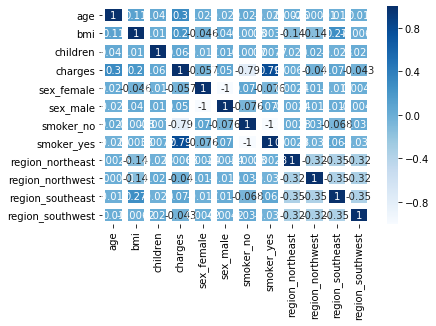

In [12]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidths=5)

In [13]:
df_cur = df.drop(['sex_male' , 
                  'smoker_no', 
                  'region_northeast', 
                  'region_northwest',
                  'region_southeast',
                  'region_southwest'], axis=1)
df_cur

,age,bmi,children,charges,sex_female,smoker_yes
0,19,27.900,0,16884.92400,1,1
1,18,33.770,1,1725.55230,0,0
2,28,33.000,3,4449.46200,0,0
3,33,22.705,0,21984.47061,0,0
4,32,28.880,0,3866.85520,0,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0
1334,18,31.920,0,2205.98080,1,0
1335,18,36.850,0,1629.83350,1,0
1336,21,25.800,0,2007.94500,1,0


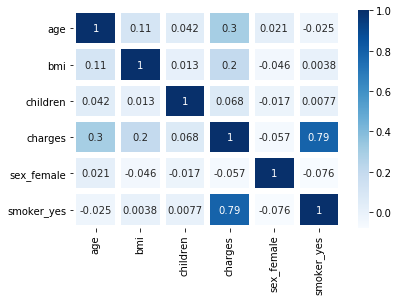

In [14]:
sns.heatmap(df_cur.corr(), annot=True, cmap="Blues", linewidths=5)

(Besides heatmap)

We can compute the **variance influence factors** for each predicting variable. It is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone. Again, we take advantage of the special __outlier influence__ class in __statsmodels__.

In [15]:
df_cur.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'smoker_yes'], dtype='object')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_cur.values, i) for i in range(df_cur.shape[1])]
vif["features"] = df_cur.columns

In [17]:
vif
# bad if > 10

,VIF Factor,features
0,9.340449,age
1,8.515399,bmi
2,1.801534,children
3,7.855317,charges
4,1.915233,sex_female
5,3.947567,smoker_yes


In [18]:
names = df_cur.columns

for i in range(0,len(names)):
    
    y = df_cur.loc[:, df_cur.columns == names[i]]
    x  = df_cur.loc[:, df_cur.columns != names[i]]
    
    model = sm.OLS(y, x)
    output = model.fit()
    
    r_squared = output.rsquared
    
    vif = round(1/(1-r_squared), 2)
    
    if vif >= 10:
        print("The R-Squared value for column {} is {} with all the other columns as features".format(names[i], r_squared))
        print("We can exclude this feature as the Variance Inflation Factor for column {} is {}".format(names[i], vif))
        print("\n")
        
    else:
        print("The R-Squared value for column {} is {} with all the other columns as features".format(names[i], r_squared))
        print("We can include this feature as the Variance Inflation Factor for column {} is {}".format(names[i], vif))
        print("\n")

The R-Squared value for column age is 0.892938759889849 with all the other columns as features
We can include this feature as the Variance Inflation Factor for column age is 9.34


The R-Squared value for column bmi is 0.8825656855430843 with all the other columns as features
We can include this feature as the Variance Inflation Factor for column bmi is 8.52


The R-Squared value for column children is 0.4449175063797871 with all the other columns as features
We can include this feature as the Variance Inflation Factor for column children is 1.8


The R-Squared value for column charges is 0.8726976960633697 with all the other columns as features
We can include this feature as the Variance Inflation Factor for column charges is 7.86


The R-Squared value for column sex_female is -1.3043326314011794 with all the other columns as features
We can include this feature as the Variance Inflation Factor for column sex_female is 0.43


The R-Squared value for column smoker_yes is -2.85610258367

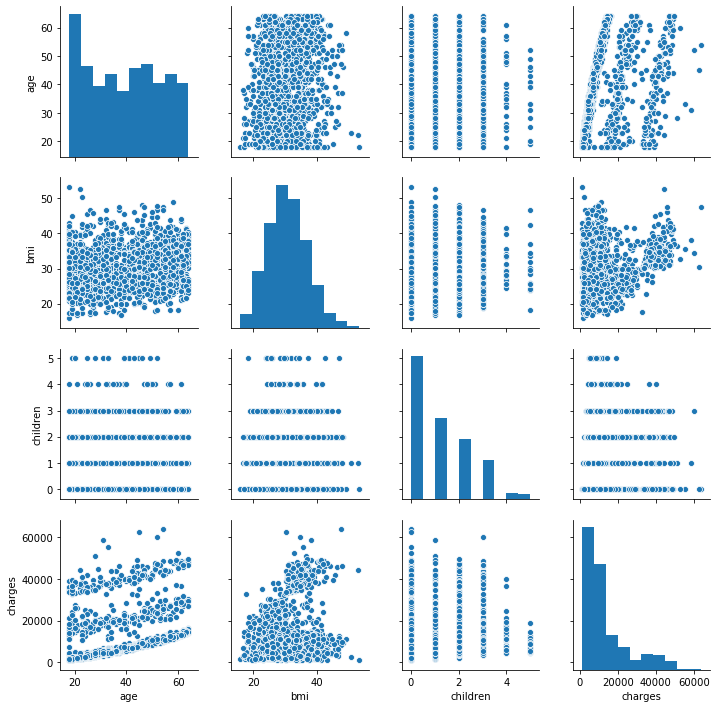

In [19]:
sns.pairplot(df_raw)

 ### Build a model

In [20]:
model = smf.ols("charges ~ age + bmi + children + sex_female + smoker_yes", data=df).fit()

model.summary()

# Remember, the model above is not taking into account the possible presence of heteroscedasticity. 
# This is noted in “Covariance Type: nonrobust”.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        11:17:00   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.218e+04    963.902    -12.637      0.000   -1.41e+04   -1.03e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
children     474.4111    137.856      3.441      0.001     203.973     744.849
sex_female   128.6399    333.361      0.386      0.700    -525.329     782.609
smoker_yes  2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/octopus/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/octopus/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/octopus/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


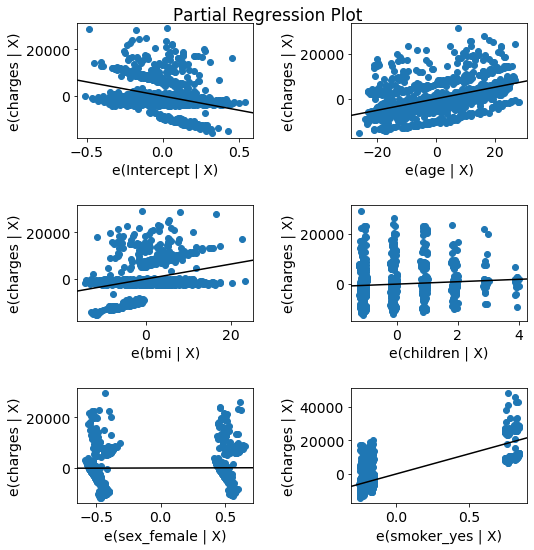

In [21]:
# For a quick check of all the regressors, you can use plot_partregress_grid.

# The partial regression plot shows the relationship between the response and the given explanatory variable 
# after removing the effect of all other explanatory variables.

plt.rc("figure", figsize=(8,8))
plt.rc("font", size=14)
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=2)

---------------------------------------------

#### Checking the assumptions

1. 
To test the assumption that the **errors are independent**, one can use the **Durbin-Watson test**; this is the method **statsmodels.stats.stattools.durbin_watson()**. For this test, a value of 2, or close to it, is ideal. The statistical value ranges between 0-4 where a value closer to 0 is more evidence for positive serial correlation and a value closer to 4 is more evidence for negative serial correlation.

In [22]:
statsmodels.stats.stattools.durbin_watson(model.resid)

2.086920012094652

2. Assumption of **normality of the residuals**.
It is often miss-understood about what normality is being tested. For linear regression, it is the residuals- not the variables themselves. This can be tested with the **Kolmogorov-Smirnov test** (smd.kstest_normal), **Jarque-Bera test** (sms.jarque_bera), or the **Shapiro-Wilk test** for normality on the model’s residuals. 

In [23]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 720.3800687692882),
 ('Chi^2 two-tail prob.', 3.7278259757942934e-157),
 ('Skew', 1.2142859799683747),
 ('Kurtosis', 5.650217692702732)]

A Jarque-Bera value of 6 or higher indicates that errors are not normally distributed and the normality null hypothesis has been rejected at the 5% significance level. A value close to 0 indicates the data is normally distributed. Similarly, a Chi squared probability more than 0.05 does not enable rejecting the null hypothesis of normality, however, for values less than 0.05 means the null hypothesis can be rejected. The function also gives values of the skewness and Kurtosis of the distribution which are used in the formula.

In [24]:
name = ["Kolmogorov-Smirnov", "P-val"]
test = smd.kstest_normal(model.resid, dist='norm')
lzip (name, test)

/home/octopus/miniconda3/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


[('Kolmogorov-Smirnov', 0.16325762683595402), ('P-val', 4.863889523297393e-99)]

If the p-value is more than 0.05 then the null hypothesis that the sample comes from a normal distribution cannot be rejected, for values less than 0.05 the null hypothesis can be rejected.

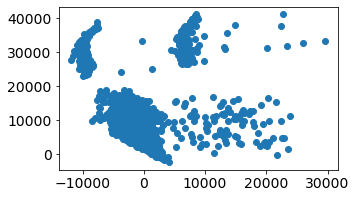

In [25]:
# Pplotting residuals vs. predictions, where residuals are prediction errors.

pred_val = model.fittedvalues.copy()
true_val = df['charges'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(5, 3))
_ = ax.scatter(residual, pred_val)

In [26]:
model.resid

0       -8776.932895
1       -2093.226283
2       -2647.268255
3       18341.038366
4       -1509.441081
            ...     
1333    -1511.952329
1334     -670.652719
1335    -2836.055596
1336      330.975511
1337    -7722.532208
Length: 1338, dtype: float64

In [27]:
true_val - pred_val

0       -8776.932895
1       -2093.226283
2       -2647.268255
3       18341.038366
4       -1509.441081
            ...     
1333    -1511.952329
1334     -670.652719
1335    -2836.055596
1336      330.975511
1337    -7722.532208
Length: 1338, dtype: float64

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

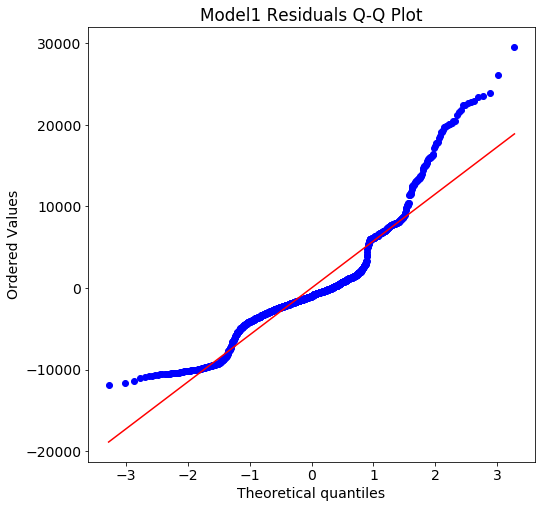

In [28]:
#Running plot & giving it a title
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

3. The assumption of **homoscedasticity** is a vital assumption for linear regression. If this assumption is violated, then the standard errors will be biased. The standard errors are used to conduct significance tests, and calculate the confidence intervals.

The GQ's Null hypothesis is that the variance in the two sub-samples are the same (calcs the p-value of the hypothesis that the variance in one subsample is larger than in the other subsample).

The BP tests the hypothesis that the residual variance does not depend on the variables in x in the form.

In [29]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 0.9539363403966973), ('p-value', 0.7280340607376128)]

In [30]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 118.01722364744062),
 ('p-value', 8.25305330731732e-24),
 ('f-value', 25.77068216788699),
 ('f p-value', 6.805799513393271e-25)]

The test is significant meaning the data violates the assumption of homoscedasticity, i.e. heteroscedasticity is present in the data. What to do? Either one can use a robust regression method that accounts for the heteroscedasticity, or transform the variables to improve the model.

#### Approach with robust regression method: 

In order to account for the heteroscedasticity in the data, one has to select a heteroscedasticity consistent covariance matrix (HCCM) and pass it in the “cov_type=” argument apart of the .fit() method. There are a few HCCMs to choose from:

* HC0 and HC1, not good on sample size ≤ 250
* HC2, good on sample size ≤ 250
* HC3, which out performs HC0, HC1, and HC2 when sample size ≤ 250 (little difference in performance when sample is ≥ 500).

Let’s see the results of the model that accounts for this. 

In [31]:
model3 = smf.ols("charges ~ age + bmi + children + sex_female + smoker_yes", data= df).fit(cov_type='HC3')

model3.summary()
# Accounting for the heteroscedasiticity has slightly altered the F-statistics and the standard errors. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     475.4
Date:                Tue, 25 May 2021   Prob (F-statistic):          4.21e-293
Time:                        11:17:50   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.218e+04   1016.418    -11.984      0.000   -1.42e+04   -1.02e+04
age          257.7350     11.875     21.705      0.000     234.461     281.009
bmi          322.3642     30.156     10.690      0.000     263.259     381.470
children     474.4111    131.357      3.612      0.000     216.956     731.866
sex_female   128.6399    335.076      0.384      0.701    -528.096     785.376
smoker_yes  2.382e+04    576.182     41.347      0.000    2.27e+04     2.5e+04
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        11:18:00   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.218e+04    963.902    -12.637      0.000   -1.41e+04   -1.03e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
children     474.4111    137.856      3.441      0.001     203.973     744.849
sex_female   128.6399    333.361      0.386      0.700    -525.329     782.609
smoker_yes  2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now you see that the statistical tests used to test the assumptions are provided at the bottom of the model’s summary: it provides tests for the assumptions of independent errors (Durban-Watson), normality of residuals (Jarque-Bera), or the presence of homoscedasticity (Omnibus/Breusch-Pagan). **BUT** one does however, have to check for the presence of multicollinearity before running the model.

#### A closer look at dependent variable:

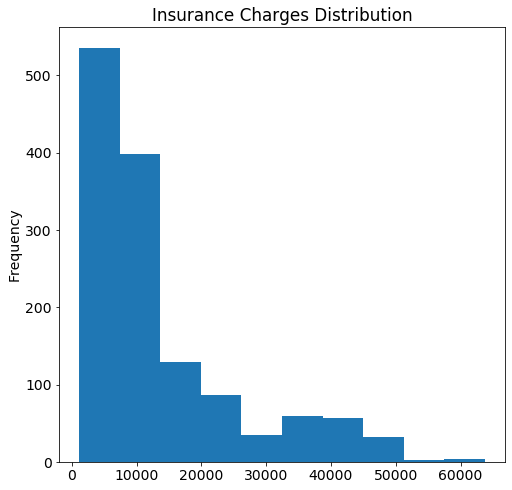

In [33]:
df['charges'].plot(kind='hist', 
                   title= 'Insurance Charges Distribution')

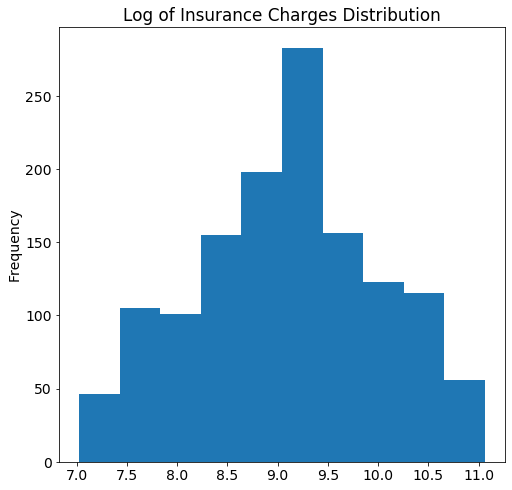

In [34]:
import numpy as np
df['charges_log'] = np.log(df['charges'])
df['charges_log'].plot(kind='hist', 
                       title= 'Log of Insurance Charges Distribution')

You can see how it transforms the data into more of a normal distribution which would likely change the residuals as well. One should test this for each variable’s residuals to find the culprit and decide what to do. The best way to graphically check for normality is to use a Q-Q plot.

**BUT** remeber that trasforming data may complicate results interpretation.

## !! 
Note that model without logging of DV gave information that sex is not a significant regressor.



In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        11:19:06   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.218e+04    963.902    -12.637      0.000   -1.41e+04   -1.03e+04
age          257.7350     11.904     21.651      0.000     234.383     281.087
bmi          322.3642     27.419     11.757      0.000     268.576     376.153
children     474.4111    137.856      3.441      0.001     203.973     744.849
sex_female   128.6399    333.361      0.386      0.700    -525.329     782.609
smoker_yes  2.382e+04    412.523     57.750      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.103   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.380
Skew:                           1.214   Prob(JB):                    3.73e-157
Kurtosis:                       5.650   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
model_log = smf.ols("charges_log ~ age + bmi + children + sex_female + smoker_yes", data=df).fit()

NameError: name 'smf' is not defined

In [36]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     861.5
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        11:18:36   Log-Likelihood:                -820.35
No. Observations:                1338   AIC:                             1653.
Df Residuals:                    1332   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9371      0.071     97.567      0.000       6.798       7.077
age            0.0347      0.001     39.536      0.000       0.033       0.036
bmi            0.0109      0.002      5.394      0.000       0.007       0.015
children       0.1017      0.010     10.004      0.000       0.082       0.122
sex_female     0.0750      0.025      3.050      0.002       0.027       0.123
smoker_yes     1.5502      0.030     50.946      0.000       1.491       1.610
==============================================================================
Omnibus:                      452.170   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1604.926
Skew:                           1.639   Prob(JB):                         0.00
Kurtosis:                       7.248   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

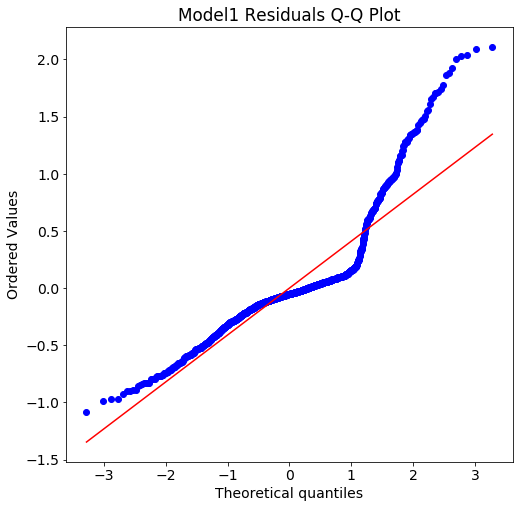

In [38]:
#Running plot & giving it a title
stats.probplot(model_log.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

In [ ]:
model = model_log

### SUMMARY

#### LINEAR REGRESSION INTERPRETATION
* First one has to look to see if the model is significant. This information is found in “Prov (F-statistic)= “, the current model is significant. 
* Now one can look at the affects of each IV on the DV (the IV coefficients) and see if it is a significant predictor or not (P>|z|). Summary indicats that sex doesn't matter in this context.

* The coefficient can be interpreted as the affect in unit change in terms of the DV. Meaning, for every 1 unit increase in the IV, the DV will increase or decrease by the coefficient amount. In the example above, for every year increase in age, there will be a $258 increase in the insurance premium charge. 

### Bonus

######  Influence tests

Let's talk a bit about observations (not features). 
Once created, an object of class OLSInfluence holds attributes and methods that allow users to assess the influence of each observation.

Cook’s distance essentially measures the effect of deleting a given observation. Points with a large Cook’s distance need to be closely examined for being potential outliers. We can plot the Cook’s distance using a special **outlier influence** class from **statsmodels**.

In [207]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Compute the influence to get Cook's distance
inf = OLSInfluence(model)

# cooks_distance is an attribute of incluence, here C, not sure about P (p-value maybe?)
inf.cooks_distance

(0       0.000245
 1       0.001046
 2       0.000108
 3       0.008766
 4       0.000023
           ...   
 1333    0.000007
 1334    0.000280
 1335    0.001768
 1336    0.000549
 1337    0.003188
 Length: 1338, dtype: float64,
 array([1.        , 0.99999999, 1.        , ..., 0.99999998, 1.        ,
        0.99999985]))

/home/octopus/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


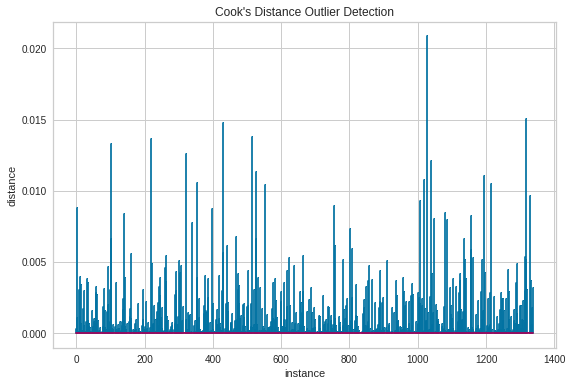

In [208]:
C, P = inf.cooks_distance

def plot_cooks_distance(c):
    _, ax = plt.subplots(figsize=(9,6))
    ax.stem(c, markerfmt=",")
    ax.set_xlabel("instance")
    ax.set_ylabel("distance")
    ax.set_title("Cook's Distance Outlier Detection")
    return ax


plot_cooks_distance(C)

# threashold is about 0.02

# Another framework for linear regression models

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [40]:
raw_data = pd.read_csv("data/housing_data.csv")
raw_data # raw_data.head() and raw_data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [41]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [42]:
raw_data.dtypes[raw_data.dtypes!='object'].index

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [43]:
raw_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [44]:
np.sum(raw_data.isnull())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

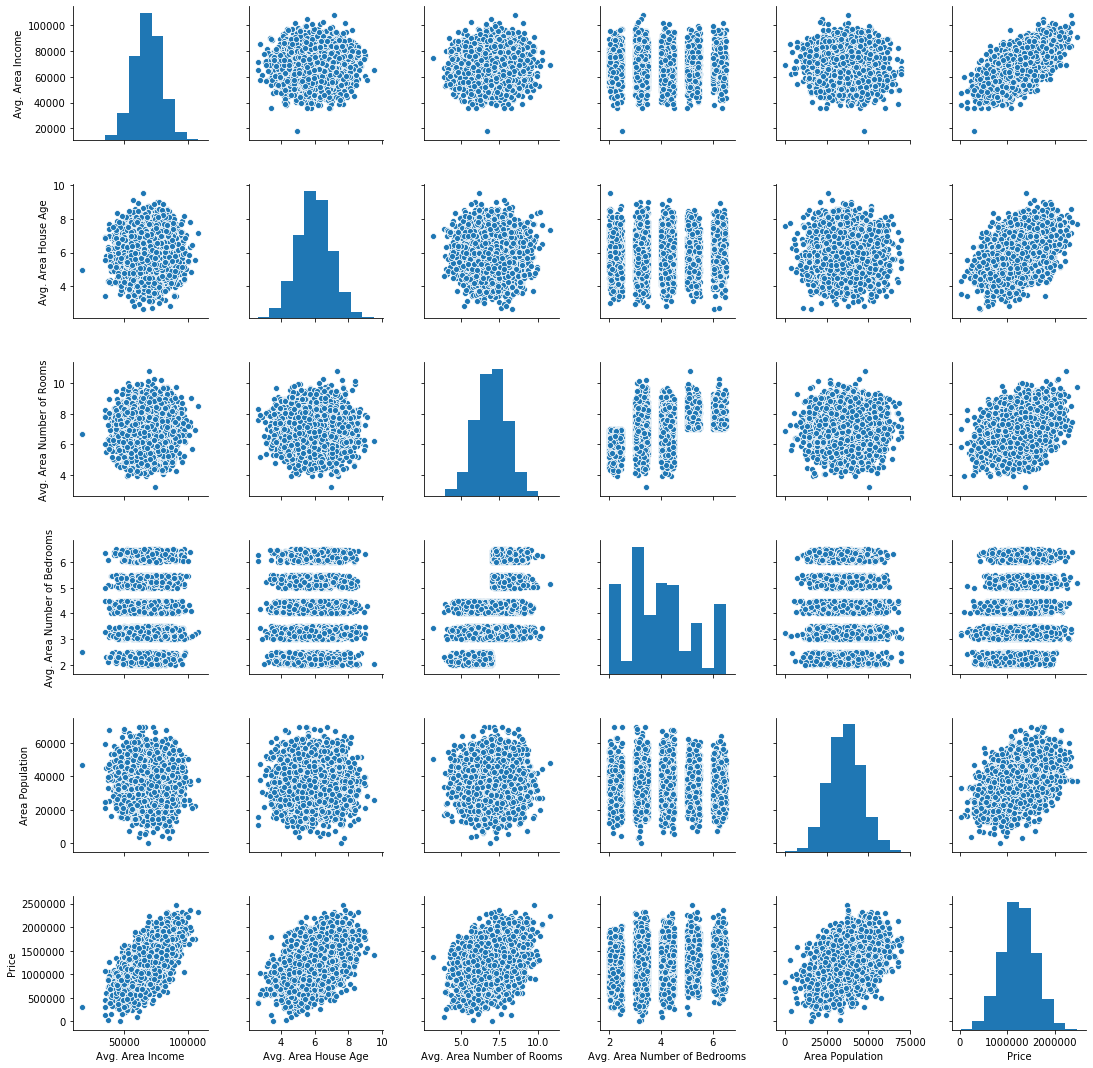

In [45]:
sns.pairplot(raw_data)

In [46]:
list(raw_data) # [0:5]

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

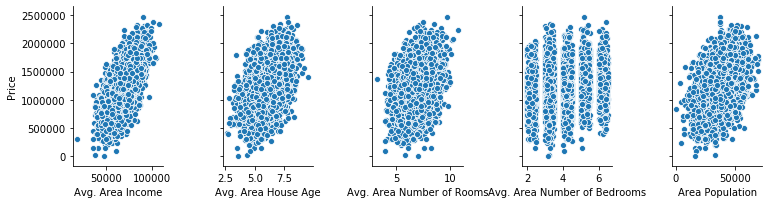

In [47]:
sns.pairplot(raw_data, 
             x_vars=['Avg. Area Income',
                     'Avg. Area House Age',
                     'Avg. Area Number of Rooms',
                     'Avg. Area Number of Bedrooms',
                     'Area Population'],
             y_vars='Price',
             height=3, 
             aspect=0.7, 
             kind='scatter')

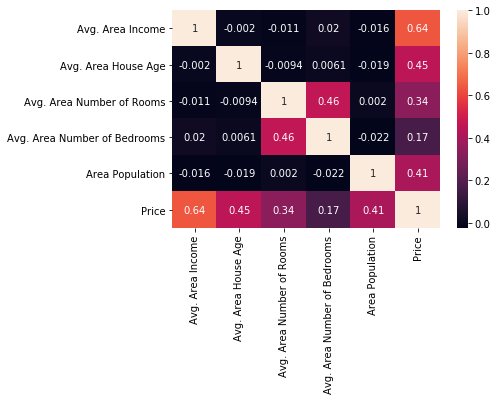

In [48]:
sns.heatmap(raw_data.corr(), annot=True)

In [49]:
raw_data.drop(['Avg. Area Number of Bedrooms', 'Address'], axis=1, inplace=True)

In [50]:
raw_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


In [51]:
raw_data.corr().Price.sort_values(ascending=False)

Price                        1.000000
Avg. Area Income             0.639734
Avg. Area House Age          0.452543
Area Population              0.408556
Avg. Area Number of Rooms    0.335664
Name: Price, dtype: float64

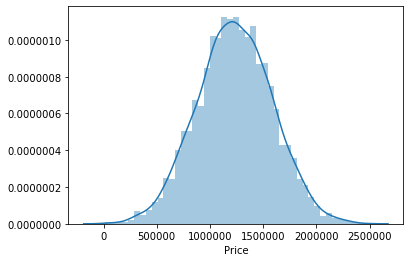

In [52]:
sns.distplot(raw_data.Price)

### Building a Machine Learning Linear Regression Model

The first thing we need to do is split our data into an x-array (which contains the data that we will use to make predictions) 
and an y-array (which contains the data that we are trying to predict).

In [53]:
list(raw_data)

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Area Population',
 'Price']

In [54]:
x = raw_data[list(raw_data)[0:4]]

In [55]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472
...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035
4996,78491.275435,6.999135,6.576763,25616.115489
4997,63390.686886,7.250591,4.805081,33266.145490
4998,68001.331235,5.534388,7.130144,42625.620156


In [56]:
y = raw_data['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [57]:
# scikit-learn makes it very easy to divide our data set into training data and test data:

from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3) # 30% 

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
# Next, we need to create an instance of the Linear Regression Python object. 
# We will assign this to a variable called model. Here is the code for this:

In [61]:
model = LinearRegression()

In [62]:
model.fit(x_train, y_train)

LinearRegression()

In [63]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -2651090.1275060447
slope: [2.15236153e+01 1.67215000e+05 1.21990600e+05 1.53665197e+01]


In [64]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Avg. Area Income,21.523615
Avg. Area House Age,167215.000087
Avg. Area Number of Rooms,121990.599721
Area Population,15.366520


In [65]:
r_sq = model.score(x_train, y_train) # return value is 𝑅².
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9182457628951883


However, having a complex model and 𝑅² very close to 1 might also be a sign of overfitting.
Test it with the new data (x_test)!

In [66]:
r_sq = model.score(x_test, y_test) # return value is 𝑅².
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9172025375161873


Not that case!

#### It’s time to use the model to make predictions from our test data set.

In [67]:
y_fitted = model.predict(x_train)

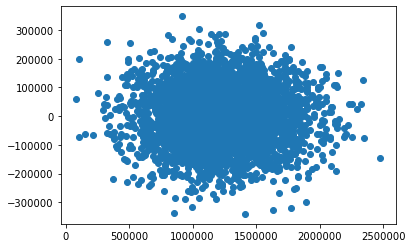

In [68]:
plt.scatter(y_fitted, y_train - y_fitted)

(array([ 10.,  69., 254., 621., 849., 840., 552., 253.,  44.,   8.]),
 array([-340626.97973638, -271730.97301579, -202834.96629519,
        -133938.95957459,  -65042.952854  ,    3853.0538666 ,
          72749.0605872 ,  141645.06730779,  210541.07402839,
         279437.08074898,  348333.08746958]),
 <a list of 10 Patch objects>)

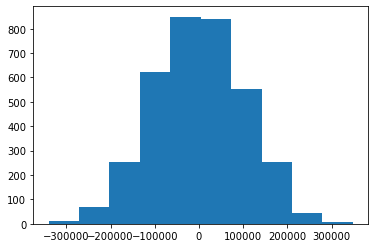

In [69]:
plt.hist(y_train - y_fitted)

The residuals from our machine learning model appear to be normally distributed!  